In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import time
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, recall_score, precision_score,classification_report
import pickle
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

In [4]:
import pandas as pd
vac_data = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/Vaccine.csv")


In [5]:
vac_data.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0        1.00            0.00                  0.00   
1          1        3.00            2.00                  0.00   
2          2        1.00            1.00                  0.00   
3          3        1.00            1.00                  0.00   
4          4        2.00            1.00                  0.00   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0               0.00              0.00                   0.00   
1               1.00              0.00                   1.00   
2               1.00              0.00                   0.00   
3               1.00              0.00                   1.00   
4               1.00              0.00                   1.00   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
0                    0.00                       1.00              1.00   
1                    0.00                       1.00              1.00   
2                    0.00                       0.00              0.00   
3                    1.00                       0.00              0.00   
4                    1.00                       0.00              1.00   

   dr_recc_h1n1_vacc  dr_recc_seasonal_vacc  chronic_medic_condition  \
0               0.00                   0.00                     0.00   
1               0.00                   0.00                     0.00   
2                NaN                    NaN                     1.00   
3               0.00                   1.00                     1.00   
4               0.00                   0.00                     0.00   

   cont_child_undr_6_mnths  is_health_worker  has_health_insur  \
0                     0.00              0.00              1.00   
1                     0.00              0.00              1.00   
2                     0.00              0.00               NaN   
3                     0.00              0.00               NaN   
4                     0.00              0.00               NaN   

   is_h1n1_vacc_effective  is_h1n1_risky  sick_from_h1n1_vacc  \
0                    3.00           1.00                 2.00   
1                    5.00           4.00                 4.00   
2                    3.00           1.00                 1.00   
3                    3.00           3.00                 5.00   
4                    3.00           3.00                 2.00   

   is_seas_vacc_effective  is_seas_risky  sick_from_seas_vacc    age_bracket  \
0                    2.00           1.00                 2.00  55 - 64 Years   
1                    4.00           2.00                 4.00  35 - 44 Years   
2                    4.00           1.00                 2.00  18 - 34 Years   
3                    5.00           4.00                 1.00      65+ Years   
4                    3.00           1.00                 4.00  45 - 54 Years   

      qualification   race     sex               income_level marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  housing_status          employment                census_msa  no_of_adults  \
0            Own  Not in Labor Force                   Non-MSA          0.00   
1           Rent            Employed  MSA, Not Principle  City          0.00   
2            Own            Employed  MSA, Not Principle  City          2.00   
3           Rent  Not in Labor Force       MSA, Principle City          0.00   
4            Own            Employed  MSA, Not Principle  City          1.00   

   no_of_children  h1n1_vaccine  
0            0.00             0  
1            0.00             0  
2   

In [6]:
vac_data.shape

(26707, 34)

In [7]:
# Data types of columns
vac_data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [8]:
# Summary information about the dataset
vac_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [9]:
# Descriptive statistics of the numerical columns
vac_data.describe()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
count  26,707.00   26,615.00       26,591.00             26,636.00   
mean   13,353.00        1.62            1.26                  0.05   
std     7,709.79        0.91            0.62                  0.22   
min         0.00        0.00            0.00                  0.00   
25%     6,676.50        1.00            1.00                  0.00   
50%    13,353.00        2.00            1.00                  0.00   
75%    20,029.50        2.00            2.00                  0.00   
max    26,706.00        3.00            2.00                  1.00   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
count          26,499.00         26,688.00              26,665.00   
mean                0.73              0.07                   0.83   
std                 0.45              0.25                   0.38   
min                 0.00              0.00                   0.00   
25%                 0.00              0.00                   1.00   
50%                 1.00              0.00                   1.00   
75%                 1.00              0.00                   1.00   
max                 1.00              1.00                   1.00   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
count               26,620.00                  26,625.00         26,579.00   
mean                     0.36                       0.34              0.68   
std                      0.48                       0.47              0.47   
min                      0.00                       0.00              0.00   
25%                      0.00                       0.00              0.00   
50%                      0.00                       0.00              1.00   
75%                      1.00                       1.00              1.00   
max                      1.00                       1.00              1.00   

       dr_recc_h1n1_vacc  dr_recc_seasonal_vacc  chronic_medic_condition  \
count          24,547.00              24,547.00                25,736.00   
mean                0.22                   0.33                     0.28   
std                 0.41                   0.47                     0.45   
min                 0.00                   0.00                     0.00   
25%                 0.00                   0.00                     0.00   
50%                 0.00                   0.00                     0.00   
75%                 0.00                   1.00                     1.00   
max                 1.00                   1.00                     1.00   

       cont_child_undr_6_mnths  is_health_worker  has_health_insur  \
count                25,887.00         25,903.00         14,433.00   
mean                      0.08              0.11              0.88   
std                       0.28              0.32              0.33   
min                       0.00              0.00              0.00   
25%                       0.00              0.00              1.00   
50%                       0.00              0.00              1.00   
75%                       0.00              0.00              1.00   
max                       1.00              1.00              1.00   

       is_h1n1_vacc_effective  is_h1n1_risky  sick_from_h1n1_vacc  \
count               26,316.00      26,319.00            26,312.00   
mean                     3.85           2.34                 2.36   
std                      1.01           1.29                 1.36   
min                      1.00           1.00                 1.00   
25%                      3.00           1.00                 1.00   
50%                      4.00           2.00                 2.00   
75%                      5.00           4.00                 4.00   
max                      5.00           5.00                 5.00   

       is_seas_vacc_effective  is_seas_risky  sick_from_seas_vacc  \
count               26,245.00      26,193.00

Data Cleaning

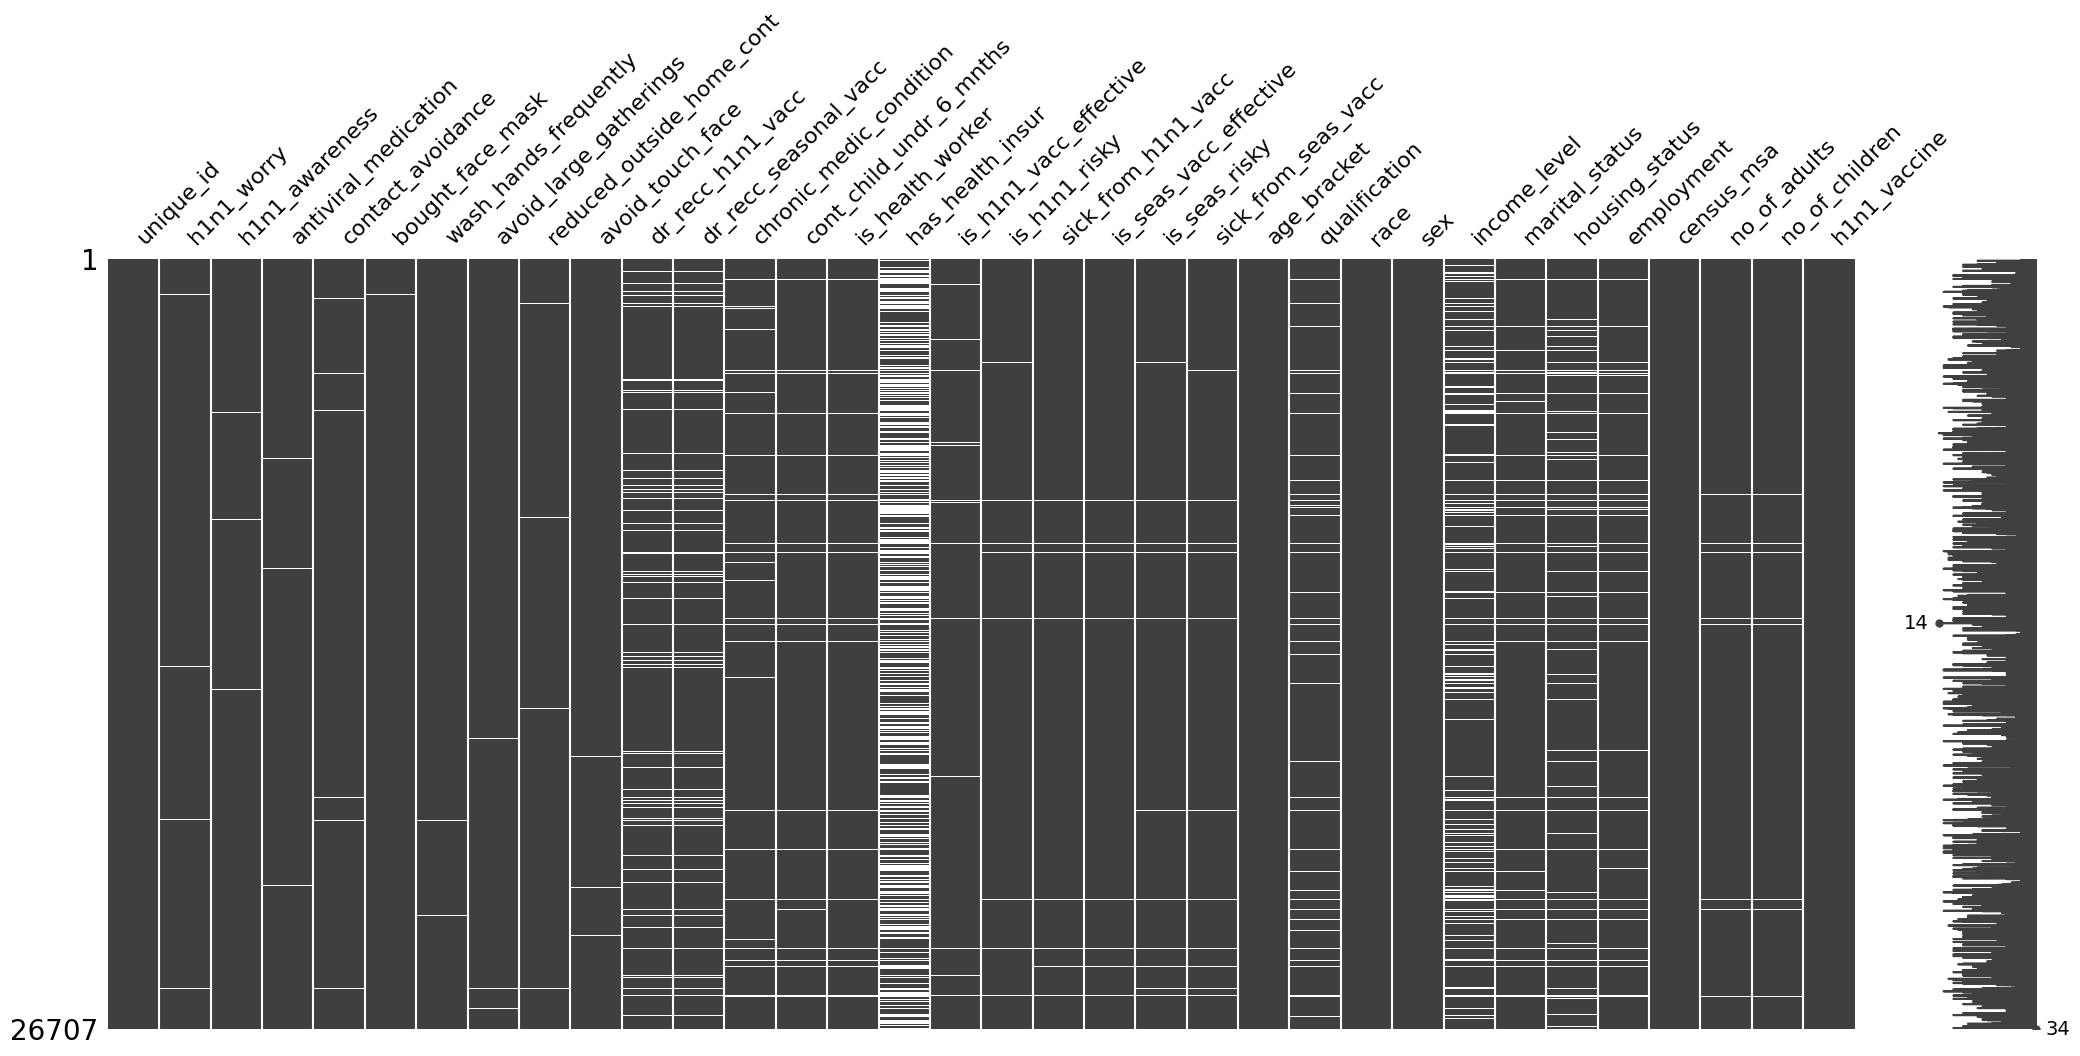

In [10]:
import missingno as msno

# Visualize the missingness
msno.matrix(vac_data)
plt.show()


In [11]:
vac_data.drop(['unique_id'],axis=1,inplace=True)

<Axes: >

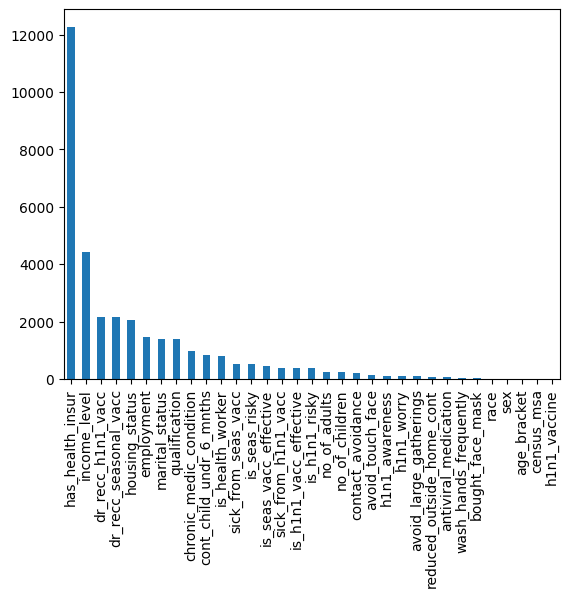

In [12]:
vac_data.isna().sum().sort_values(ascending=False).plot(kind='bar')


In [13]:
vac_data.isna().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [14]:
len(vac_data.loc[vac_data['has_health_insur'].isna() == True])

12274

In [15]:
vac_data['has_health_insur'].unique()

array([ 1., nan,  0.])

In [16]:
len(vac_data.loc[vac_data['has_health_insur'] == 1])

12697

In [17]:
len(vac_data.loc[vac_data['has_health_insur'] == 0])

1736

In [18]:
len(vac_data['has_health_insur'])

26707

In [19]:



# Impute missing values
numerical_features = vac_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = vac_data.select_dtypes(include=['object']).columns

# Impute numerical features with mean
numerical_imputer = SimpleImputer(strategy='mean')
vac_data[numerical_features] = numerical_imputer.fit_transform(vac_data[numerical_features])

# Impute categorical features with most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
vac_data[categorical_features] = categorical_imputer.fit_transform(vac_data[categorical_features])

# Drop columns with a large number of missing values
vac_data.drop('has_health_insur', axis=1, inplace=True)

# Fix decimal values
vac_data = vac_data.round(decimals=2)


The other feature which contains a significant amount of null values is 'health_insurance'. Out of 26,707 entries, 12,274 entries are null values. 12,697 participants reported they had health insurance while 1,736 reported they did not. The sample in the dataset is roughly 12% uninsured. This percentage is close to the national rate of 10.9% as of 2019. Due to the nature of binary data, it is difficult to plug in a ratio (sample or national) in the entries in order to address the null values. Albeit, we can evenly distribute 1s and 0s to reflect the non-null portion, doing so would introduce randomness into the data and further hide the relationship between feature and target variables. Removing the column entirely would best serve the later modeling processes.

Exploratory Analysis

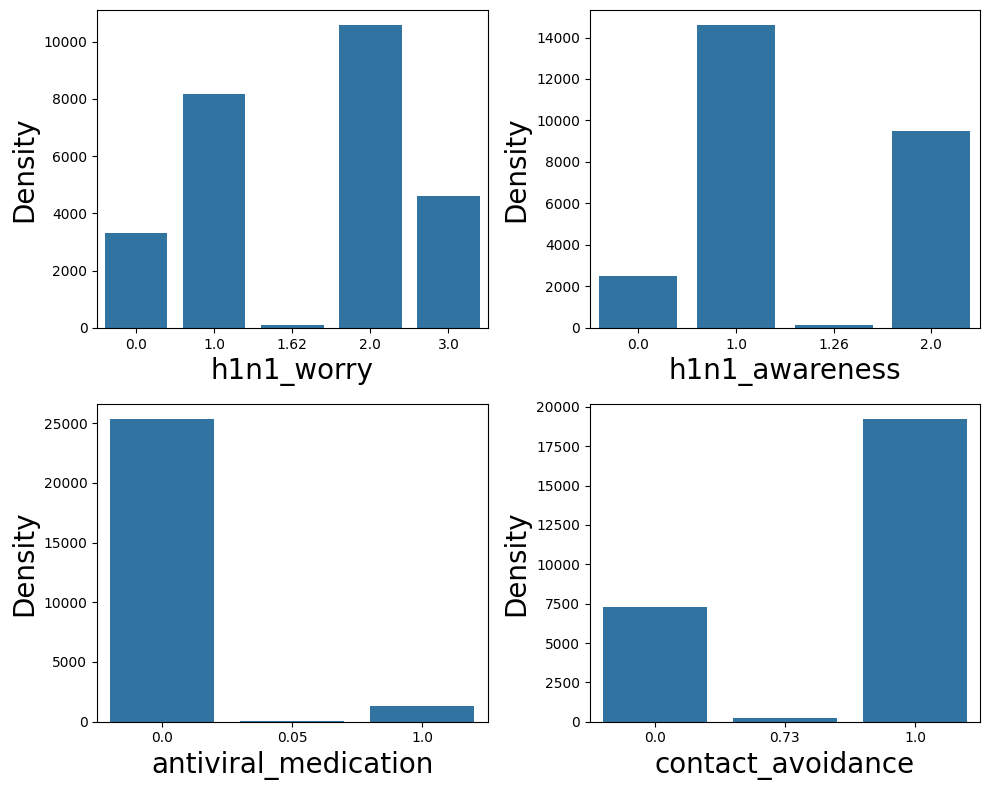

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns for count plots
box = vac_data[['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance']]

# Create subplots
plt.figure(figsize=(10, 8))
plt_num = 1  # Plot number

for col in box.columns:
    plt.subplot(2, 2, plt_num)
    sns.countplot(x=col, data=box)
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt_num += 1

plt.tight_layout()
plt.show()


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


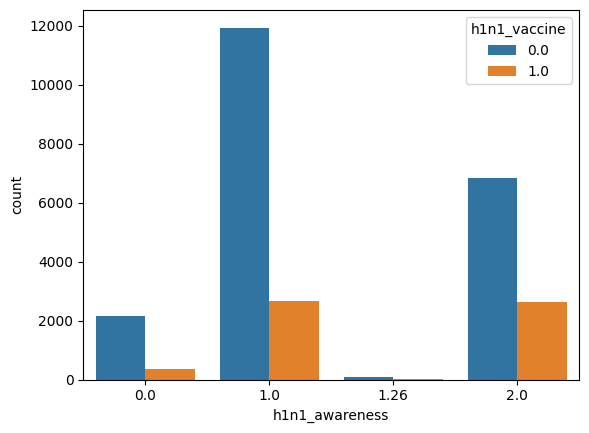

In [21]:
sns.countplot(x = 'h1n1_awareness', data = vac_data, hue = 'h1n1_vaccine')
plt.show()

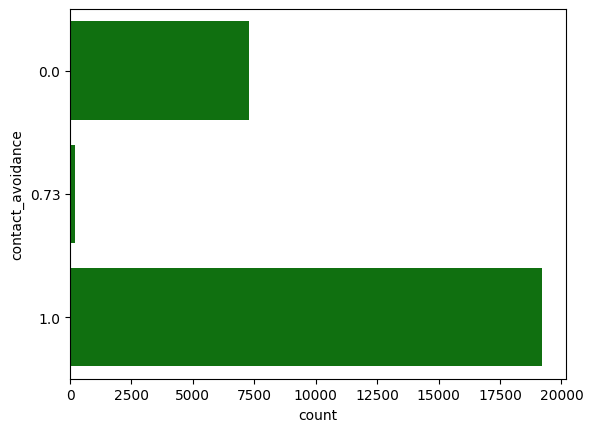

In [22]:
sns.countplot(y = 'contact_avoidance', data = vac_data, color = 'green')
plt.show()

In [23]:
h1n1_awareness_counts = vac_data['h1n1_awareness'].value_counts()
print(h1n1_awareness_counts)

h1n1_awareness
1.00    14598
2.00     9487
0.00     2506
1.26      116
Name: count, dtype: int64


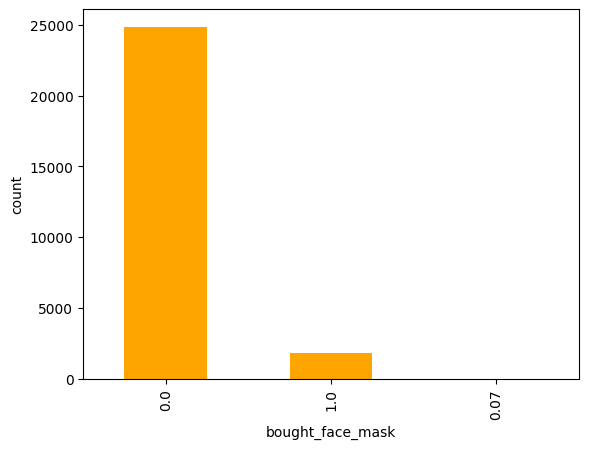

In [24]:
vac_data['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

<Axes: ylabel='count'>

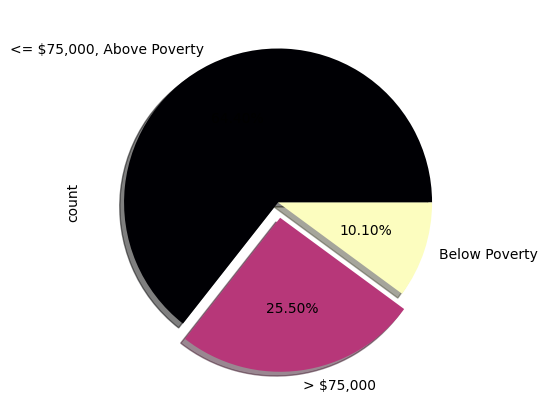

In [25]:
vac_data['income_level'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', cmap = 'magma',
                                            explode = [0,0.1,0], figsize = [5,5], shadow = True)

<Axes: ylabel='count'>

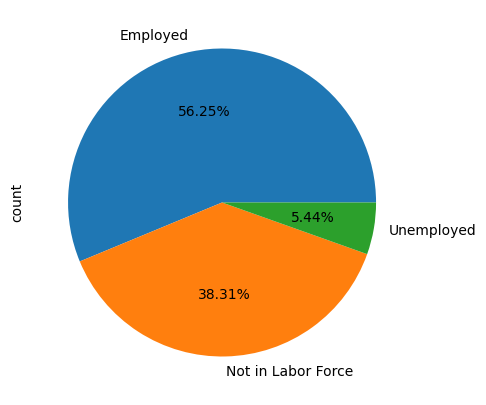

In [26]:
vac_data['employment'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5])

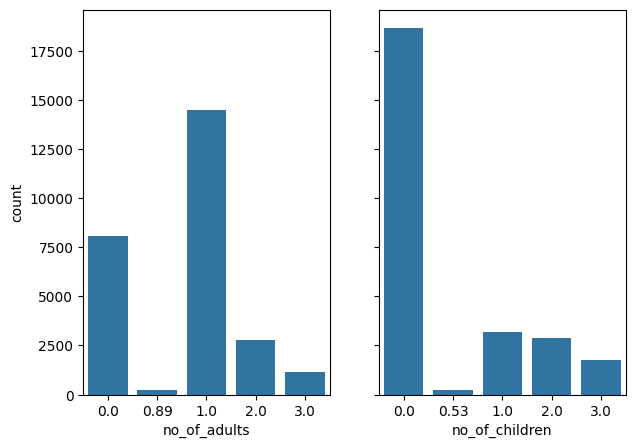

In [27]:
fig, ax = plt.subplots(1,2, figsize = [7,5], sharey = True)
sns.countplot( x = 'no_of_adults', data = vac_data, ax = ax[0])
sns.countplot( x = 'no_of_children', data = vac_data, ax = ax[1])
plt.show()

In [28]:
# Explore object columns
vac_data[[c for c in vac_data.columns if vac_data[c].dtype =='object']].describe()

age_bracket     qualification   race     sex  \
count        26707             26707  26707   26707   
unique           5                 4      4       2   
top      65+ Years  College Graduate  White  Female   
freq          6843             11504  21222   15858   

                     income_level marital_status housing_status employment  \
count                       26707          26707          26707      26707   
unique                          3              2              2          3   
top     <= $75,000, Above Poverty        Married            Own   Employed   
freq                        17200          14963          20778      15023   

                      census_msa  
count                      26707  
unique                         3  
top     MSA, Not Principle  City  
freq                       11645

In [29]:

le = preprocessing.LabelEncoder()
cols = ['age_bracket', 'qualification', 'race', 'sex','income_level','marital_status','housing_status','employment','census_msa']
# Encode labels of multiple columns at once
vac_data[cols] = vac_data[cols].apply(le.fit_transform)



# Print head
vac_data.head()

h1n1_worry  h1n1_awareness  antiviral_medication  contact_avoidance  \
0        1.00            0.00                  0.00               0.00   
1        3.00            2.00                  0.00               1.00   
2        1.00            1.00                  0.00               1.00   
3        1.00            1.00                  0.00               1.00   
4        2.00            1.00                  0.00               1.00   

   bought_face_mask  wash_hands_frequently  avoid_large_gatherings  \
0              0.00                   0.00                    0.00   
1              0.00                   1.00                    0.00   
2              0.00                   0.00                    0.00   
3              0.00                   1.00                    1.00   
4              0.00                   1.00                    1.00   

   reduced_outside_home_cont  avoid_touch_face  dr_recc_h1n1_vacc  \
0                       1.00              1.00               0.00   
1                       1.00              1.00               0.00   
2                       0.00              0.00               0.22   
3                       0.00              0.00               0.00   
4                       0.00              1.00               0.00   

   dr_recc_seasonal_vacc  chronic_medic_condition  cont_child_undr_6_mnths  \
0                   0.00                     0.00                     0.00   
1                   0.00                     0.00                     0.00   
2                   0.33                     1.00                     0.00   
3                   1.00                     1.00                     0.00   
4                   0.00                     0.00                     0.00   

   is_health_worker  is_h1n1_vacc_effective  is_h1n1_risky  \
0              0.00                    3.00           1.00   
1              0.00                    5.00           4.00   
2              0.00                    3.00           1.00   
3              0.00                    3.00           3.00   
4              0.00                    3.00           3.00   

   sick_from_h1n1_vacc  is_seas_vacc_effective  is_seas_risky  \
0                 2.00                    2.00           1.00   
1                 4.00                    4.00           2.00   
2                 1.00                    4.00           1.00   
3                 5.00                    5.00           4.00   
4                 2.00                    3.00           1.00   

   sick_from_seas_vacc  age_bracket  qualification  race  sex  income_level  \
0                 2.00            3              1     3    0             2   
1                 4.00            1              0     3    1             2   
2                 2.00            0              2     3    1             0   
3                 1.00            4              0     3    0             2   
4                 4.00            2              3     3    0             0   

   marital_status  housing_status  employment  census_msa  no_of_adults  \
0               1               0           1           2          0.00   
1               1               1           0           0          0.00   
2               1               0           0           0          2.00   
3               1               1           1           1          0.00   
4               0               0           0           0          1.00   

   no_of_children  h1n1_vaccine  
0            0.00          0.00  
1            0.00          0.00  
2            0.00          0.00  
3            0.00          0.00  
4            0.00          0.00

In [30]:
# Save the modified dataset with the new column
vac_data.to_csv('vaccine.csv', index=False)

Text(0.5, 1.0, 'H1N1 Vaccination Proportion')

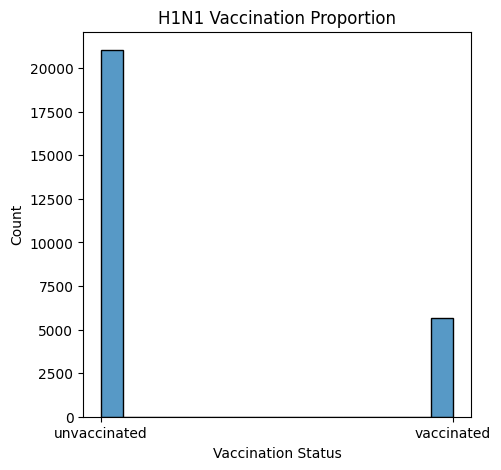

In [31]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.histplot(vac_data['h1n1_vaccine'])
plt.xticks(np.arange(2), ['unvaccinated', 'vaccinated'])
ax.set_xlabel('Vaccination Status')
ax.set_ylabel('Count')
ax.set_title('H1N1 Vaccination Proportion')
#Only about one-fifth of the total sample population were innoculated against the H1N1 Influenza. 
#However, the imbalance between the the observations should not affect our modeling.

In [32]:
X = vac_data.drop(['h1n1_vaccine'], axis=1)
y = vac_data['h1n1_vaccine']

In [33]:
vaccine_count = y.value_counts()
vaccine_count

h1n1_vaccine
0.00    21033
1.00     5674
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x28be9cdbe90>,
 [Text(-0.8639477490730085, 0.680877585819714, '0.0'),
  Text(0.8639477490730082, -0.6808775858197146, '1.0')],
 [Text(-0.4712442267670955, 0.37138777408348034, '78.75'),
  Text(0.4712442267670953, -0.3713877740834806, '21.25')])

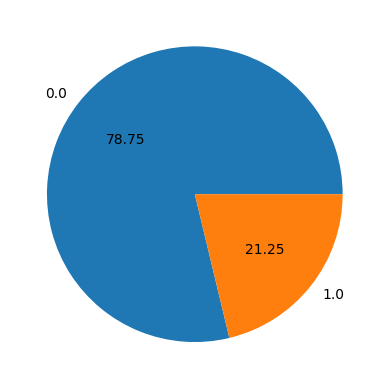

In [34]:
# Show pie plot (Approach 2)
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f', labels=vaccine_count.index)

In [35]:
vaccine_count.index

Index([0.0, 1.0], dtype='float64', name='h1n1_vaccine')

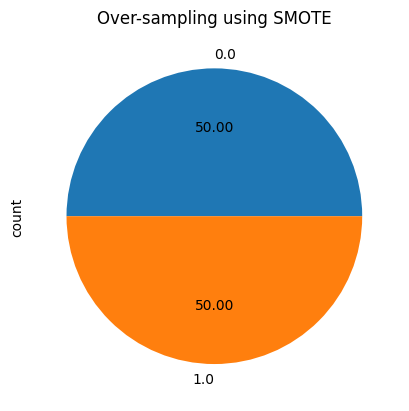

In [36]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
oversample = SMOTE()

# Perform over-sampling
x_smote, y_smote = oversample.fit_resample(X, y)

# Plot the class distribution after applying SMOTE
ax = y_smote.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling using SMOTE")

# Show the plot
plt.show()



In [37]:
x_smote.shape

(42066, 31)

In [38]:
X_train, X_test, y_train, y_test =train_test_split(x_smote,y_smote,random_state=123,test_size=0.2)

In [39]:
vac_data.loc[:, 'h1n1_worry'].value_counts(dropna=False)

h1n1_worry
2.00    10575
1.00     8153
3.00     4591
0.00     3296
1.62       92
Name: count, dtype: int64

In [40]:
cols = vac_data.iloc[:, 3:16].columns

In [41]:
for col in cols:
    print(vac_data.loc[:, col].value_counts(dropna=False))

contact_avoidance
1.00    19228
0.00     7271
0.73      208
Name: count, dtype: int64
bought_face_mask
0.00    24847
1.00     1841
0.07       19
Name: count, dtype: int64
wash_hands_frequently
1.00    22015
0.00     4650
0.83       42
Name: count, dtype: int64
avoid_large_gatherings
0.00    17073
1.00     9547
0.36       87
Name: count, dtype: int64
reduced_outside_home_cont
0.00    17644
1.00     8981
0.34       82
Name: count, dtype: int64
avoid_touch_face
1.00    18001
0.00     8578
0.68      128
Name: count, dtype: int64
dr_recc_h1n1_vacc
0.00    19139
1.00     5408
0.22     2160
Name: count, dtype: int64
dr_recc_seasonal_vacc
0.00    16453
1.00     8094
0.33     2160
Name: count, dtype: int64
chronic_medic_condition
0.00    18446
1.00     7290
0.28      971
Name: count, dtype: int64
cont_child_undr_6_mnths
0.00    23749
1.00     2138
0.08      820
Name: count, dtype: int64
is_health_worker
0.00    23004
1.00     2899
0.11      804
Name: count, dtype: int64
is_h1n1_vacc_effective
4

In [42]:
vac_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [43]:
vac_data.dropna(inplace = True)

<Axes: >

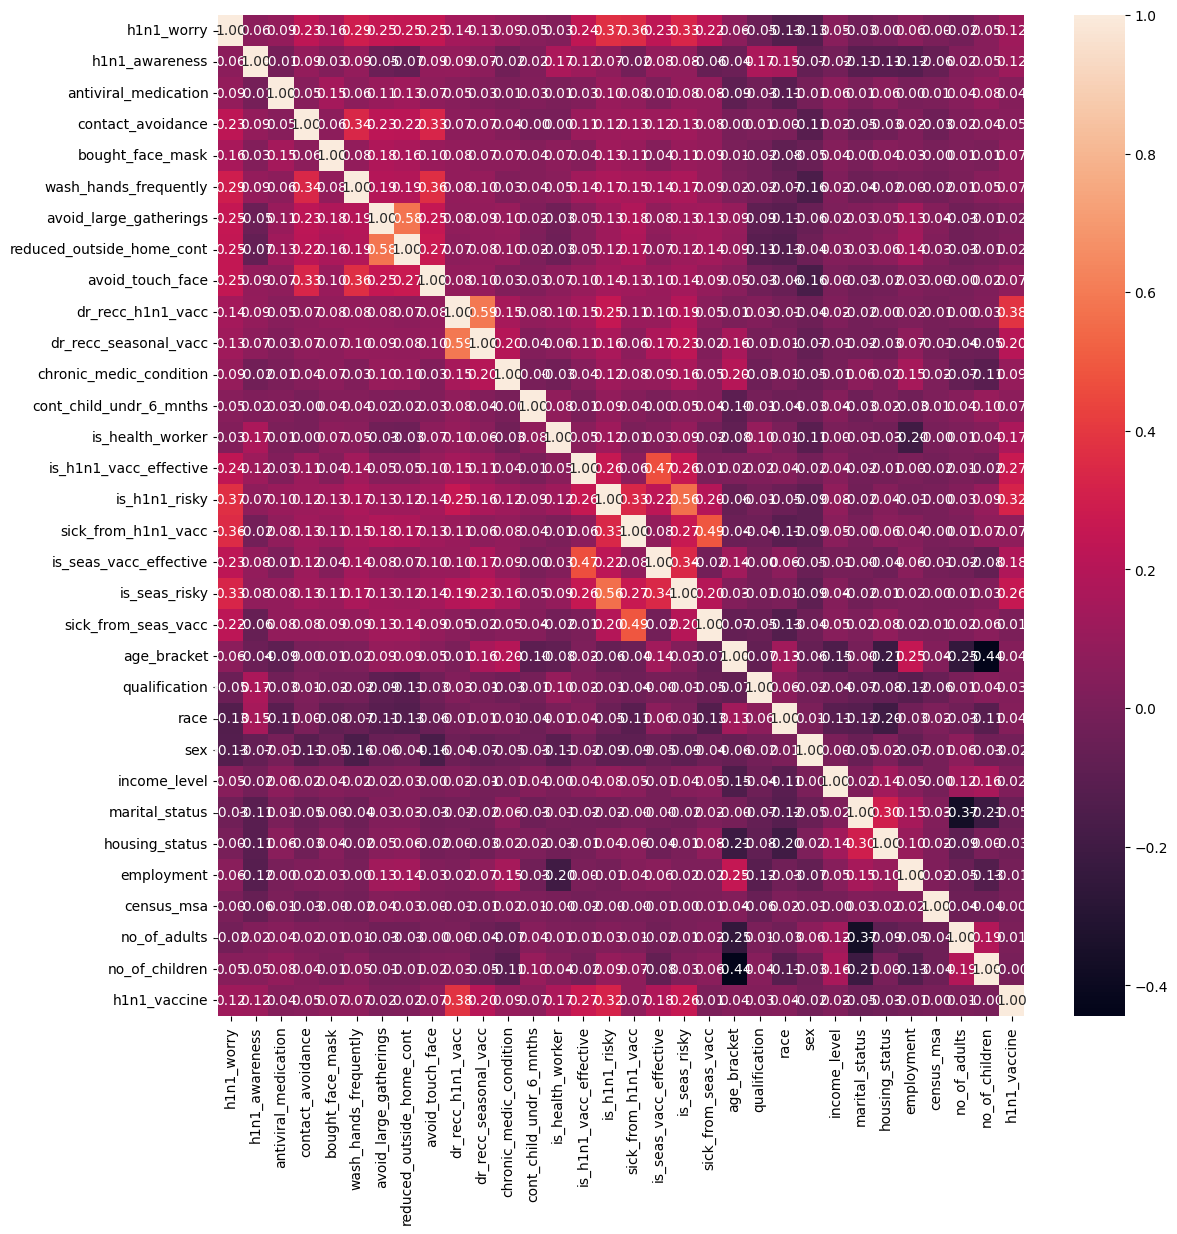

In [44]:


#visualizing any correlation between features.

plt.figure(figsize=(13,13))
sns.heatmap(vac_data.corr(), annot= True, fmt='.2f')

H1N1 Vaccine (Decision Tree)


Decision Tree Model:

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences

In [56]:
for feature in vac_data.columns:
    print(list(vac_data[feature].unique()))
#Checking to see cardinality for each feature. More importantly, the cardinality for the categorical 
#features are quite low, which make them good candidates for one-hot encoding

[1.0, 3.0, 2.0, 0.0, 1.62]
[0.0, 2.0, 1.0, 1.26]
[0.0, 1.0, 0.05]
[0.0, 1.0, 0.73]
[0.0, 1.0, 0.07]
[0.0, 1.0, 0.83]
[0.0, 1.0, 0.36]
[1.0, 0.0, 0.34]
[1.0, 0.0, 0.68]
[0.0, 0.22, 1.0]
[0.0, 0.33, 1.0]
[0.0, 1.0, 0.28]
[0.0, 1.0, 0.08]
[0.0, 1.0, 0.11]
[3.0, 5.0, 4.0, 2.0, 1.0, 3.85]
[1.0, 4.0, 3.0, 2.0, 5.0, 2.34]
[2.0, 4.0, 1.0, 5.0, 3.0, 2.36]
[2.0, 4.0, 5.0, 3.0, 1.0, 4.03]
[1.0, 2.0, 4.0, 3.0, 5.0, 2.72]
[2.0, 4.0, 1.0, 5.0, 2.12, 3.0]
[3, 1, 0, 4, 2]
[1, 0, 2, 3]
[3, 0, 2, 1]
[0, 1]
[2, 0, 1]
[1, 0]
[0, 1]
[1, 0, 2]
[2, 0, 1]
[0.0, 2.0, 1.0, 3.0, 0.89]
[0.0, 3.0, 2.0, 1.0, 0.53]
[0.0, 1.0]


In [46]:
X = vac_data.drop(['h1n1_vaccine'], axis = 1)
y = vac_data['h1n1_vaccine']

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42)
#Splitting the data into training and test sets for both H1N1 and Seasonal. In order to model each separately.

In [47]:
#Creating decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
tree_predict = clf.predict(X_test)

print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Test Score: {clf.score(X_test, y_test)}')

Training Score: 0.9999660395299871
Test Score: 0.8346275752773376


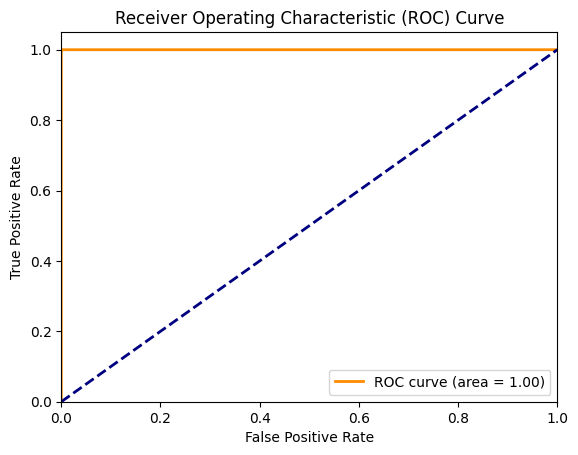

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming clf is your classifier and X_train_smote, y_train_smote are your training data
y_scores = clf.predict_proba(X_train)[:,1]  # Use predict_proba to get probability scores for positive class

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
roc_auc = roc_auc_score(y_train, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Text(0.5, 1.0, 'Initial Decision Tree for H1N1 Vaccine')

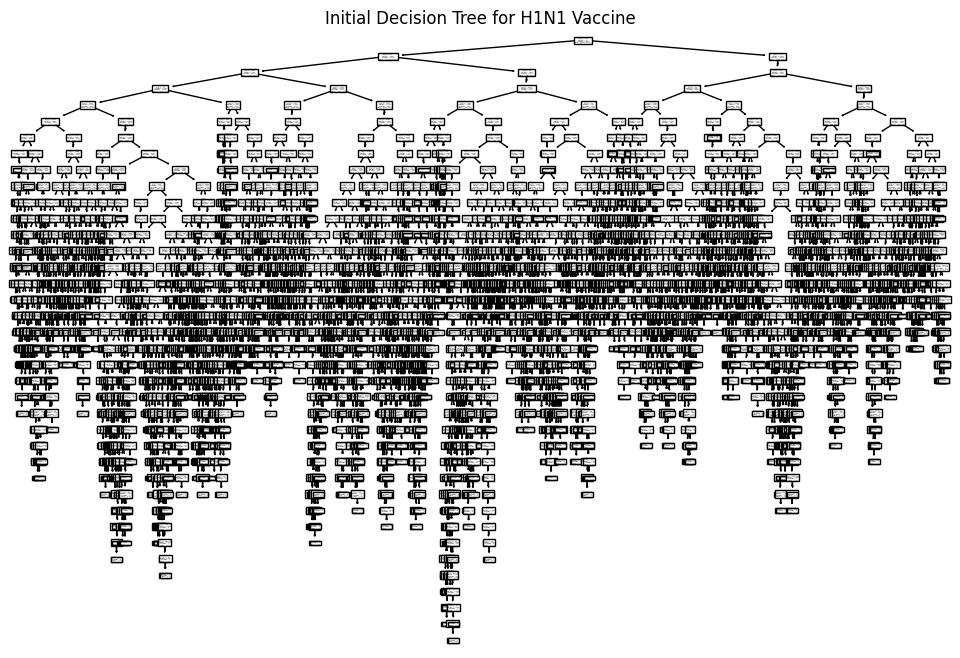

In [73]:
fig, ax = plt.subplots(figsize = (12,8))
plot_tree(clf, ax=ax)
ax.set_title('Initial Decision Tree for H1N1 Vaccine')

In [50]:
print(f'Test Accuracy Score: {accuracy_score(y_test, tree_predict)}')
print('---------')
print(f'Test Precision Score: {precision_score(y_test, tree_predict)}')
print('---------')
print(f'Test Recall Score: {recall_score(y_test, tree_predict)}')
print('---------')
print(f'Test F1 Score: {f1_score(y_test, tree_predict)}')
print('---------')
print(f'Test ROC AUC Score: {roc_auc_score(y_test, tree_predict)}')

Test Accuracy Score: 0.8346275752773376
---------
Test Precision Score: 0.8265401369010579
---------
Test Recall Score: 0.845346062052506
---------
Test F1 Score: 0.8358373318650201
---------
Test ROC AUC Score: 0.8346698739623225


In [51]:
from sklearn.metrics import confusion_matrix

# Assuming y_true are the true labels and y_pred are the predicted labels
conf_matrix = confusion_matrix(y_test, tree_predict)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[5220 1115]
 [ 972 5313]]


In [52]:
# Assuming your model is named 'model'
with open('DecisionTreeClassifier.pkl', 'wb') as f:
    pickle.dump(clf, f)


In [53]:
with open('DecisionTreeClassifier.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [55]:
# Example of using the loaded model
predictions = loaded_model.predict(X_test)
predictions


array([1., 0., 1., ..., 1., 0., 1.])


K-Nearest Neighbors

the k-nearest neighbors algorithm (k-NN) is a non-parametric classification method. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.

In [104]:
vac_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

Splitting and Scaling Data

In [106]:
# Convert dataset to int64 to handle categorical variables
kNN = vac_data.astype('int64')

# Define features (X) and target variable (y)
X = kNN.drop(['h1n1_vaccine'], axis=1)
y = kNN['h1n1_vaccine']

In [107]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

In [108]:
# Scaling the data to normalize features
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)


In [109]:
# Train the kNN model
k_near = KNeighborsClassifier(weights='distance', algorithm='auto')
k_near.fit(scaled_train, y_train)

KNeighborsClassifier(weights='distance')

In [110]:
# Make predictions on the test set
test_preds = k_near.predict(scaled_test)

In [111]:
# Print evaluation metrics
print("Metrics for kNN Model:")
print("Accuracy Score:", accuracy_score(y_test, test_preds))
print("Precision Score:", precision_score(y_test, test_preds))
print("Recall Score:", recall_score(y_test, test_preds))
print("F1 Score:", f1_score(y_test, test_preds))
print("ROC AUC Score:", roc_auc_score(y_test, test_preds))

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, test_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_preds))

Metrics for kNN Model:
Accuracy Score: 0.8274167987321711
Precision Score: 0.7635733538698498
Recall Score: 0.9465393794749404
F1 Score: 0.8452685421994884
ROC AUC Score: 0.8278868957358917

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.71      0.80      6335
         1.0       0.76      0.95      0.85      6285

    accuracy                           0.83     12620
   macro avg       0.85      0.83      0.83     12620
weighted avg       0.85      0.83      0.83     12620


Confusion Matrix:
[[4493 1842]
 [ 336 5949]]


In [112]:
# Find the best value for k
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k + 1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    print("Best Value for k:", best_k)
    print("F1-Score:", best_score)

In [113]:

print("\nFinding the Best Value for k:")
find_best_k(scaled_train, y_train, scaled_test, y_test)


Finding the Best Value for k:


Best Value for k: 1
F1-Score: 0.8658948730854965


Logistic Regression


Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

Normalization and Splitting

In [210]:
logReg=vac_data

In [211]:
for column in logReg.columns:
    logReg[column] = (logReg[column] - min(logReg[column])) / (max(logReg[column]) - min(logReg[column]))

In [212]:
X = logReg.drop(['h1n1_vaccine'], axis = 1)
y = logReg['h1n1_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)


Fitting and Predicting (H1N1 Vaccine)

In [213]:
# Create and train the logistic regression model
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [214]:
# Predictions on the training and test sets
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

In [215]:
# Evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

In [216]:


# Evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

In [217]:
# Classification report for test set
classification_rep = classification_report(y_test, y_test_pred)

In [218]:
# Print evaluation metrics
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("ROC AUC Score:", train_roc_auc)
print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("ROC AUC Score:", test_roc_auc)
print("\nClassification Report:")
print(classification_rep)

Training Set Metrics:
Accuracy: 0.8335829677971541
Precision: 0.6797683078196111
Recall: 0.4128140703517588
F1 Score: 0.5136782866968892
ROC AUC Score: 0.6801055535937127

Test Set Metrics:
Accuracy: 0.8363908648446274
Precision: 0.6901688182720953
Recall: 0.410271546635183
F1 Score: 0.5146242132543503
ROC AUC Score: 0.6804483227716189

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      6319
         1.0       0.69      0.41      0.51      1694

    accuracy                           0.84      8013
   macro avg       0.77      0.68      0.71      8013
weighted avg       0.82      0.84      0.82      8013



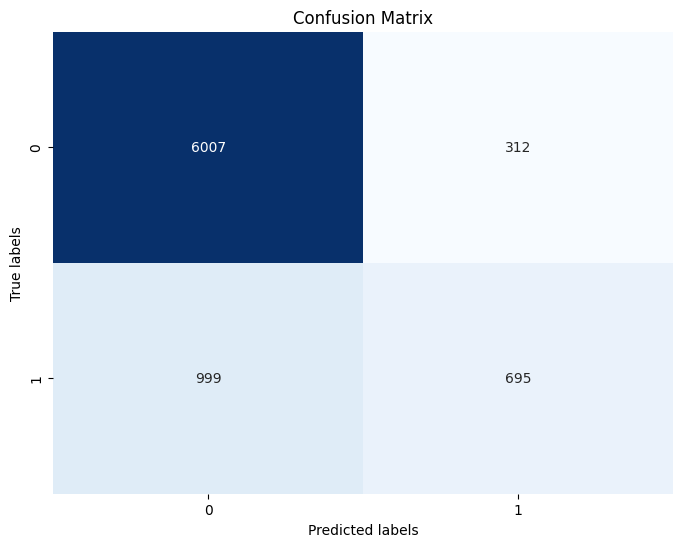

In [219]:
 #Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [125]:
import pickle
with open("logistic_regression.pkl","wb") as files:
 pickle.dump(logistic_model, files)

The residuals for training and test sets for  H1N1  Vaccines appear to be quite high 84% accuracy respectively. However, the identical residuals between training and test sets are a little suspicious.


Implementing, Iternating and Tuning Random Forest Model

Building Initial Random Forest Model

In [130]:
X = vac_data.drop(['h1n1_vaccine'], axis = 1)
y = vac_data['h1n1_vaccine']


X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42)


In [131]:
# Model training
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [132]:
rfc_pred_train = rfc.predict(X_train)
rfc_pred_test = rfc.predict(X_test)

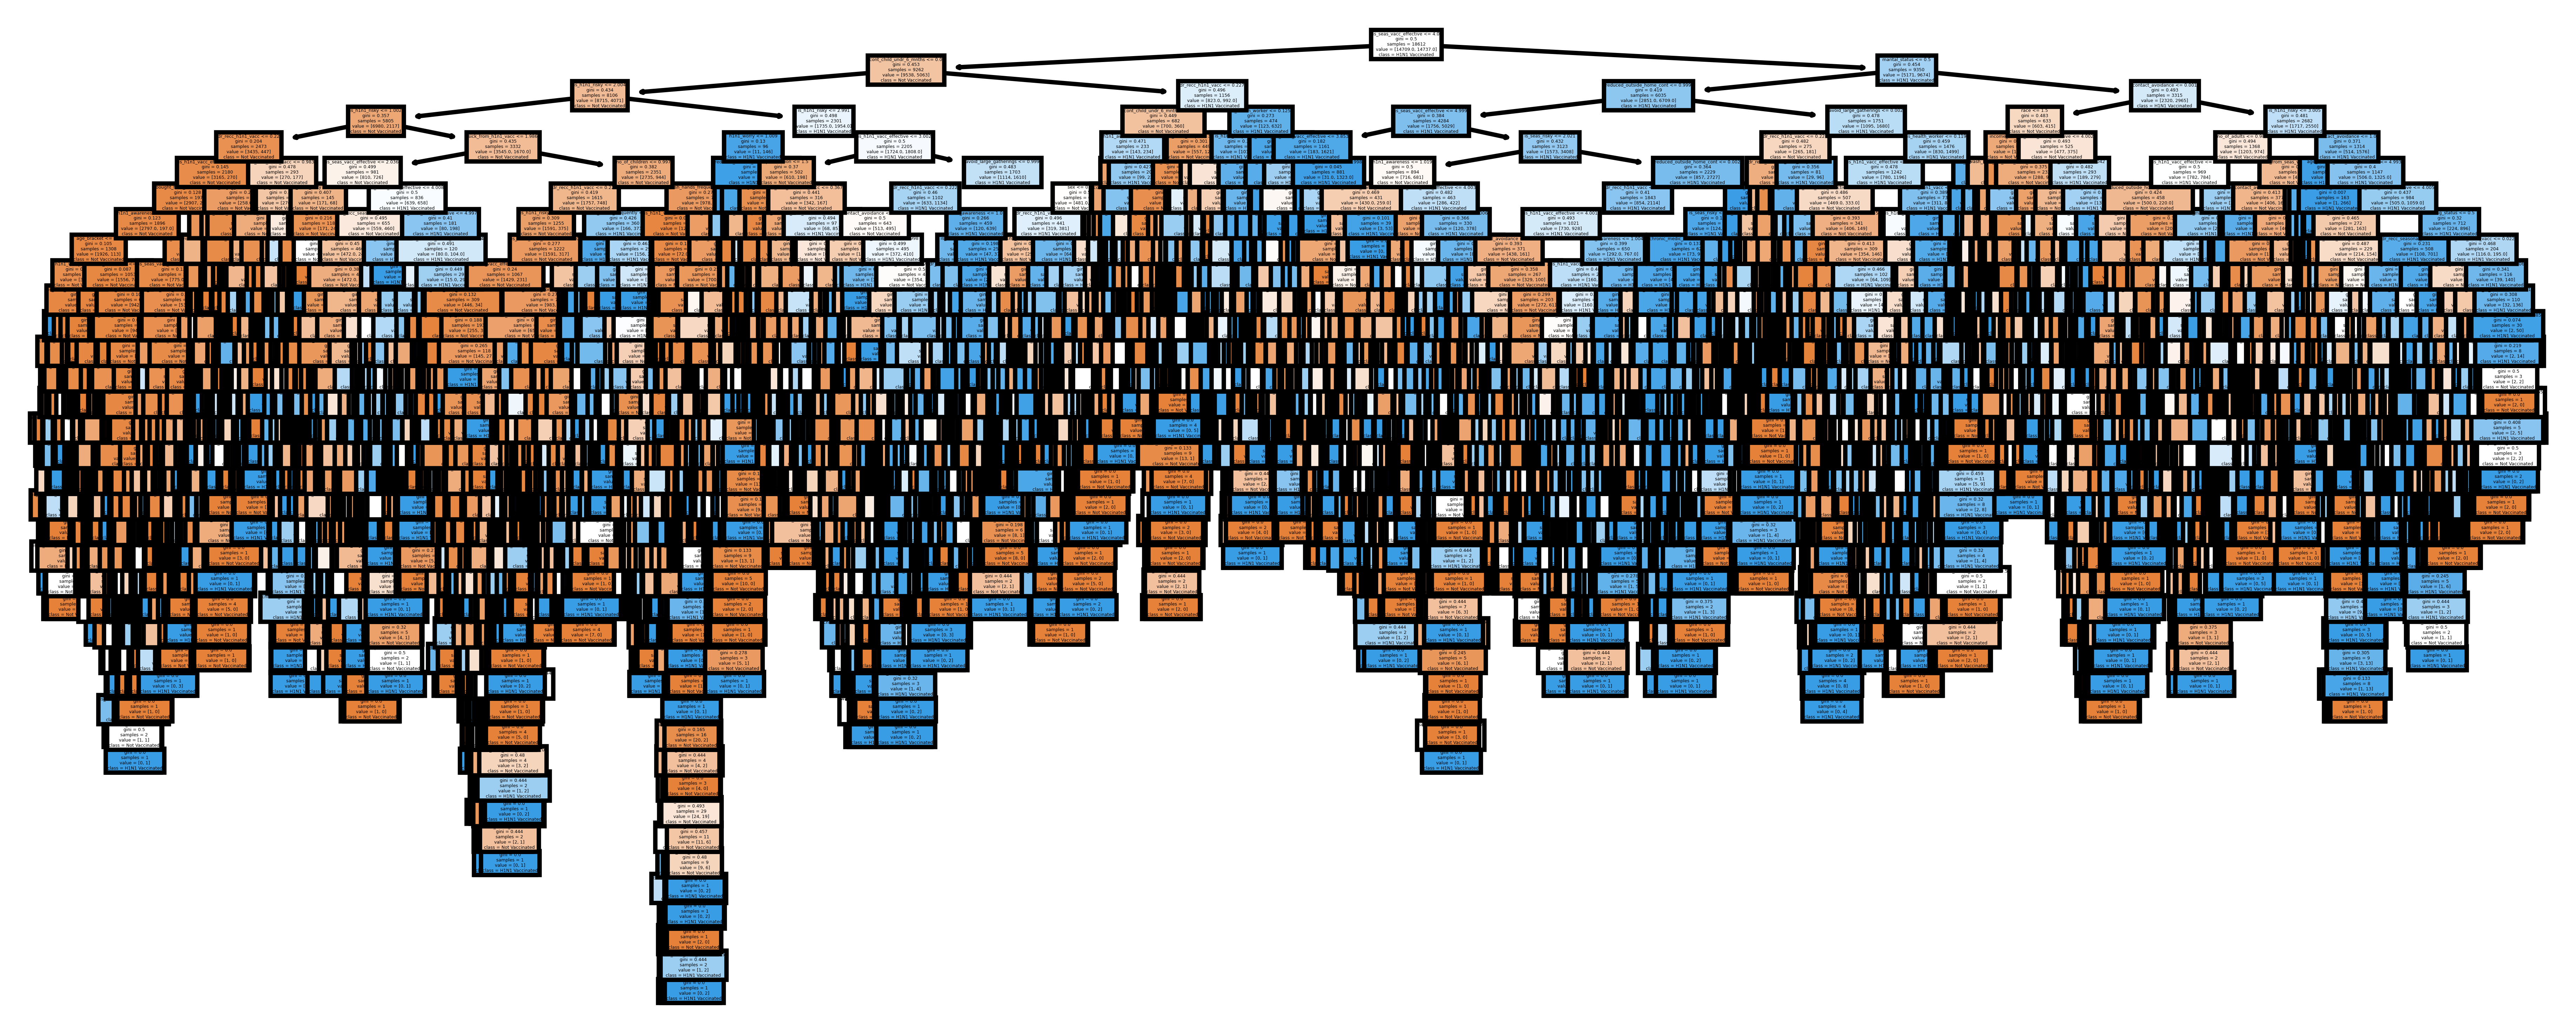

In [98]:
fn = vac_data.columns
cn = ['Not Vaccinated', 'H1N1 Vaccinated']  # Specify class names as a list
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rfc.estimators_[index],
                   feature_names=fn,
                   class_names=cn,
                   filled=True)
fig.savefig('rf_5trees.png')


In [133]:
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Test Score: {rfc.score(X_test, y_test)}')

Training Score: 0.9999660395299871
Test Score: 0.9013470681458003


In [134]:
#Creating function that prints metrics for the model
def print_metrics(labels, preds):
    """Takes in two parameters and returns the precision, recall, 
        and accuracy scores of given test target and predicted values"""

    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    print("ROC AUC Score: {}".format(roc_auc_score(labels, preds)))
    

In [135]:
print_metrics(y_train, rfc_pred_train)

Precision Score: 1.0
Recall Score: 0.9999321941958231
Accuracy Score: 0.9999660395299871
F1 Score: 0.9999660959484659
ROC AUC Score: 0.9999660970979116


In [136]:
print_metrics(y_test, rfc_pred_test)

Precision Score: 0.9243853149208487
Recall Score: 0.8733492442322991
Accuracy Score: 0.9013470681458003
F1 Score: 0.8981428454552892
ROC AUC Score: 0.9012365794957865


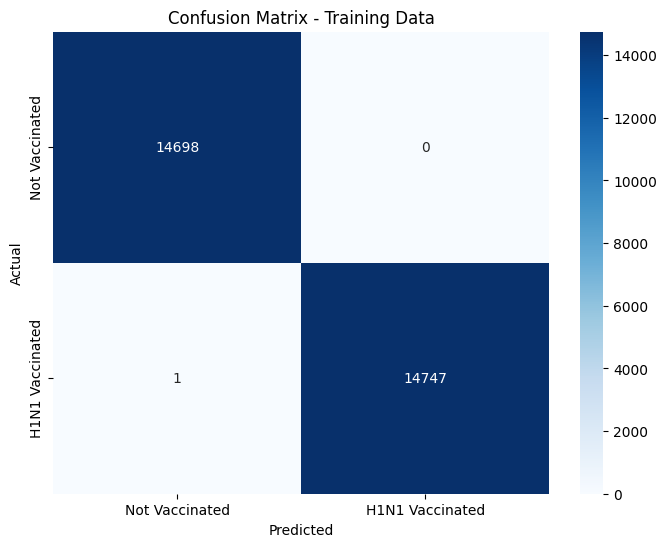

In [137]:

# Make predictions on the training data
y_pred_train = rfc.predict(X_train)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Vaccinated', 'H1N1 Vaccinated'], 
            yticklabels=['Not Vaccinated', 'H1N1 Vaccinated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_8764\542669670.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=doctor_recommendation.index, y=doctor_recommendation.values, palette='viridis')
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_g

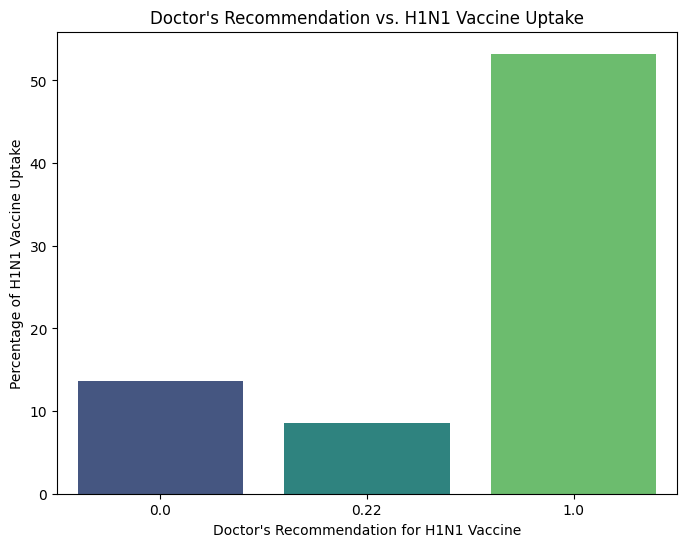

C:\Users\hp\AppData\Local\Temp\ipykernel_8764\542669670.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_vaccine.index, y=seasonal_vaccine.values, palette='magma')
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

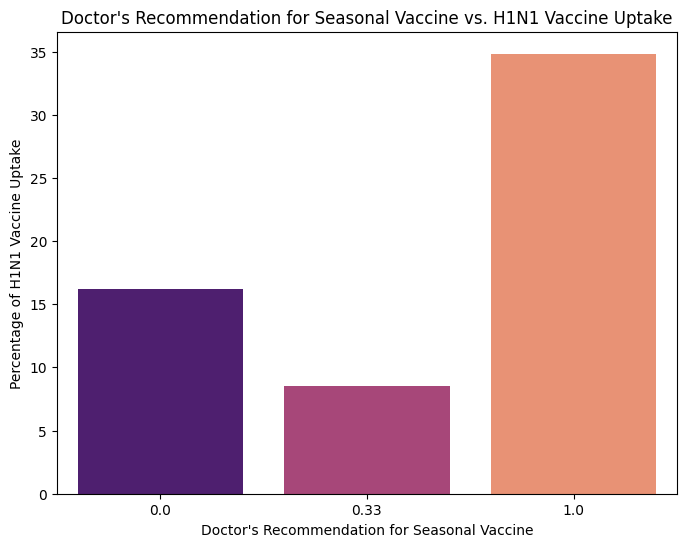

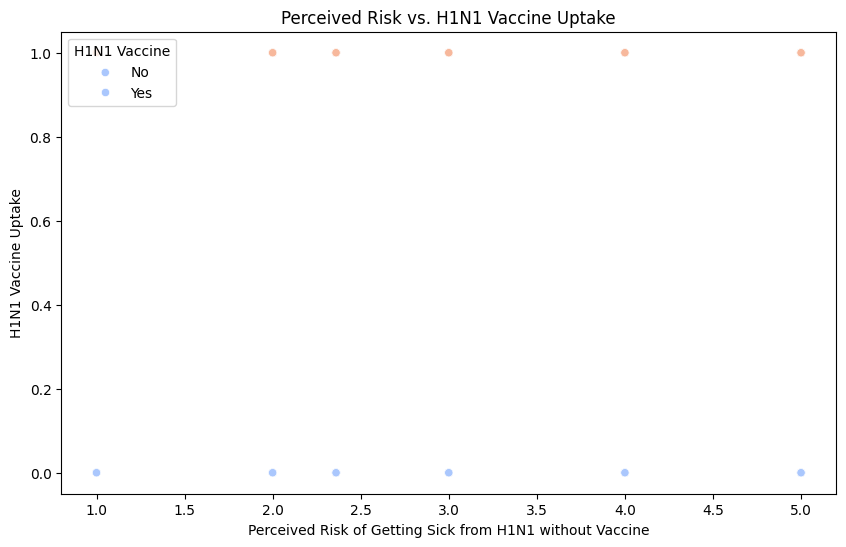

C:\Users\hp\AppData\Local\Temp\ipykernel_8764\542669670.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worry_about_vaccine.index, y=worry_about_vaccine.values, palette='coolwarm')
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

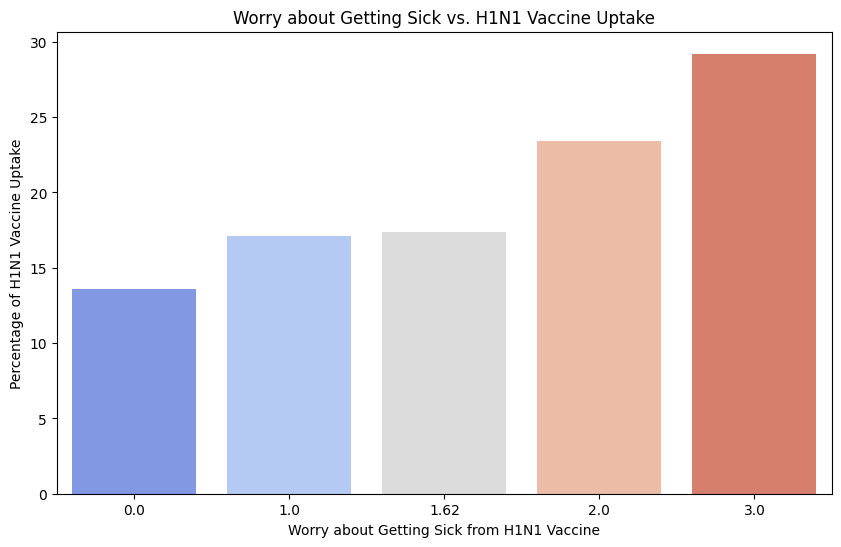

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 1: Doctor's Recommendation vs. H1N1 Vaccine Uptake
doctor_recommendation = vac_data.groupby('dr_recc_h1n1_vacc')['h1n1_vaccine'].mean() * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=doctor_recommendation.index, y=doctor_recommendation.values, palette='viridis')
plt.xlabel("Doctor's Recommendation for H1N1 Vaccine")
plt.ylabel("Percentage of H1N1 Vaccine Uptake")
plt.title("Doctor's Recommendation vs. H1N1 Vaccine Uptake")
plt.show()

# Chart 2: Seasonal Vaccine vs. H1N1 Vaccine Uptake
seasonal_vaccine = vac_data.groupby('dr_recc_seasonal_vacc')['h1n1_vaccine'].mean() * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_vaccine.index, y=seasonal_vaccine.values, palette='magma')
plt.xlabel("Doctor's Recommendation for Seasonal Vaccine")
plt.ylabel("Percentage of H1N1 Vaccine Uptake")
plt.title("Doctor's Recommendation for Seasonal Vaccine vs. H1N1 Vaccine Uptake")
plt.show()

# Chart 3: Perceived Risk of Getting Sick from H1N1 without Vaccine vs. H1N1 Vaccine Uptake
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sick_from_h1n1_vacc', y='h1n1_vaccine', data=vac_data, hue='h1n1_vaccine', palette='coolwarm')
plt.xlabel("Perceived Risk of Getting Sick from H1N1 without Vaccine")
plt.ylabel("H1N1 Vaccine Uptake")
plt.title("Perceived Risk vs. H1N1 Vaccine Uptake")
plt.legend(title="H1N1 Vaccine", loc='upper left', labels=['No', 'Yes'])
plt.show()

# Chart 4: Worry about Getting Sick from H1N1 Vaccine vs. H1N1 Vaccine Uptake
worry_about_vaccine = vac_data.groupby('h1n1_worry')['h1n1_vaccine'].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=worry_about_vaccine.index, y=worry_about_vaccine.values, palette='coolwarm')
plt.xlabel("Worry about Getting Sick from H1N1 Vaccine")
plt.ylabel("Percentage of H1N1 Vaccine Uptake")
plt.title("Worry about Getting Sick vs. H1N1 Vaccine Uptake")
plt.show()


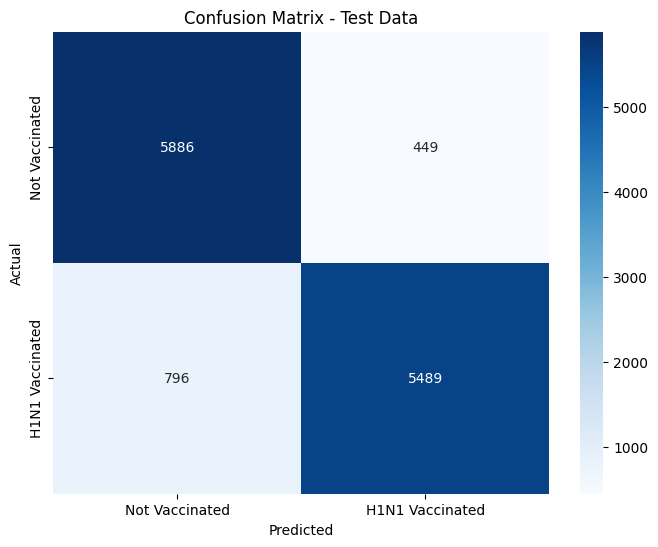

In [138]:

# Make predictions on the test data
y_pred_test = rfc.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Vaccinated', 'H1N1 Vaccinated'], 
            yticklabels=['Not Vaccinated', 'H1N1 Vaccinated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()

In [139]:
start_time = time.time()
importances = rfc.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.046 seconds


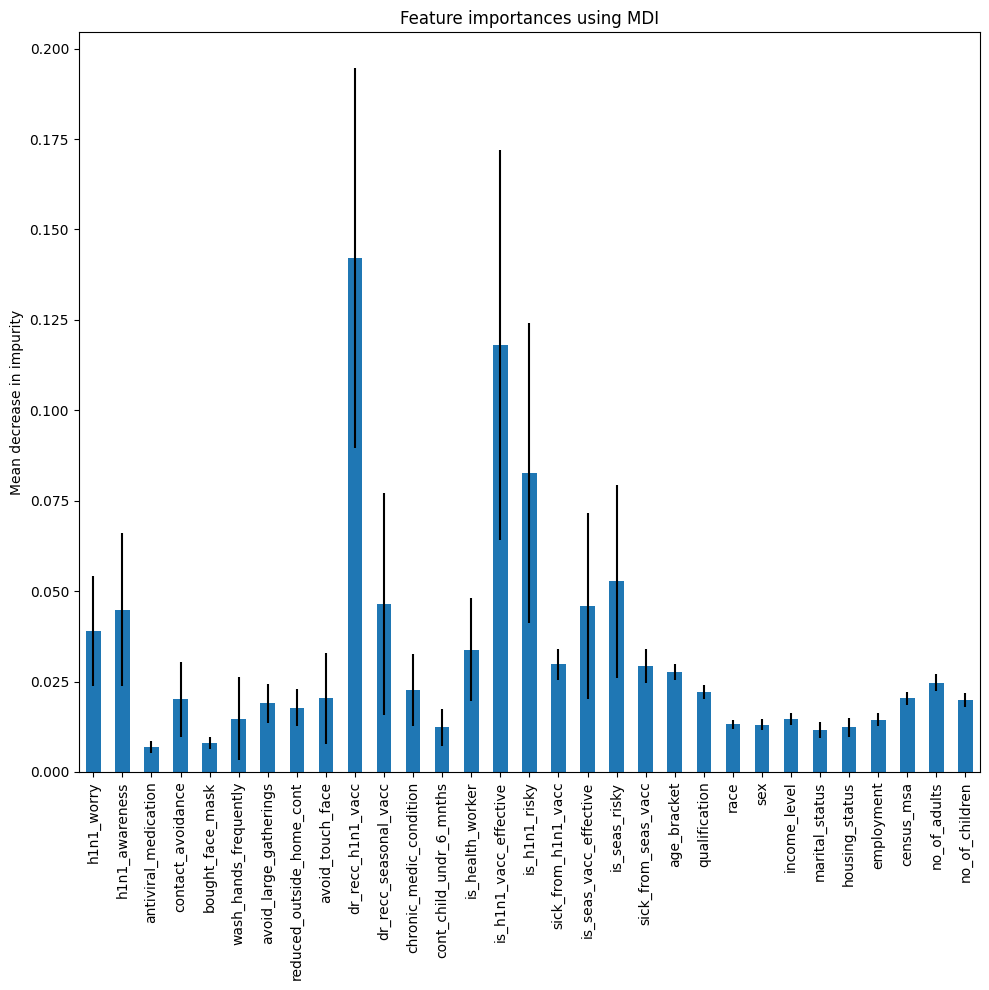

In [140]:
forest_importances = pd.Series(importances, index = X_train.columns)

fig, ax = plt.subplots(figsize = (10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [141]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: dr_recc_h1n1_vacc    Importance: 0.14
Variable: is_h1n1_vacc_effective Importance: 0.12
Variable: is_h1n1_risky        Importance: 0.08
Variable: dr_recc_seasonal_vacc Importance: 0.05
Variable: is_seas_vacc_effective Importance: 0.05
Variable: is_seas_risky        Importance: 0.05
Variable: h1n1_worry           Importance: 0.04
Variable: h1n1_awareness       Importance: 0.04
Variable: is_health_worker     Importance: 0.03
Variable: sick_from_h1n1_vacc  Importance: 0.03
Variable: sick_from_seas_vacc  Importance: 0.03
Variable: age_bracket          Importance: 0.03
Variable: contact_avoidance    Importance: 0.02
Variable: avoid_large_gatherings Importance: 0.02
Variable: reduced_outside_home_cont Importance: 0.02
Variable: avoid_touch_face     Importance: 0.02
Variable: chronic_medic_condition Importance: 0.02
Variable: qualification        Importance: 0.02
Variable: census_msa           Importance: 0.02
Variable: no_of_adults         Importance: 0.02
Variable: no_of_children 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

The model for H1N1 Vaccination  are overfitting the training set. The accuracy, precision, recall, f1, and roc auc scores for both types of vaccines are significantly higher than those of the test sets. Albeit, the

Decision Tree / Random Forest Iteration / Bagged Trees

Bagged Trees (H1N1)

In [146]:
X = vac_data.drop(['h1n1_vaccine'], axis = 1)
y = vac_data['h1n1_vaccine']


X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42)

In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [148]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
tree = DecisionTreeClassifier()
#from sklearn import svm
clf = svm.SVC(kernel='rbf')
#log_reg = LogisticRegression(solver='liblinear')
bagging_clf = BaggingClassifier(estimator=tree, n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [150]:
evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[14698     0]
 [    1 14747]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0.0       1.0  accuracy  macro avg  weighted avg
precision      1.00      1.00      1.00       1.00          1.00
recall         1.00      1.00      1.00       1.00          1.00
f1-score       1.00      1.00      1.00       1.00          1.00
support   14,698.00 14,748.00      1.00  29,446.00     29,446.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[5832  503]
 [ 845 5440]]
ACCURACY SCORE:
0.8932
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.87     0.92      0.89       0.89          0.89
recall        0.92     0.87      0.89       0.89          0.89
f1-score      0.90     0.89      0.89       0.89          0.89
support   6,335.00 6,285.00      0.89  12,620.00     12,620.00


Final Tuning

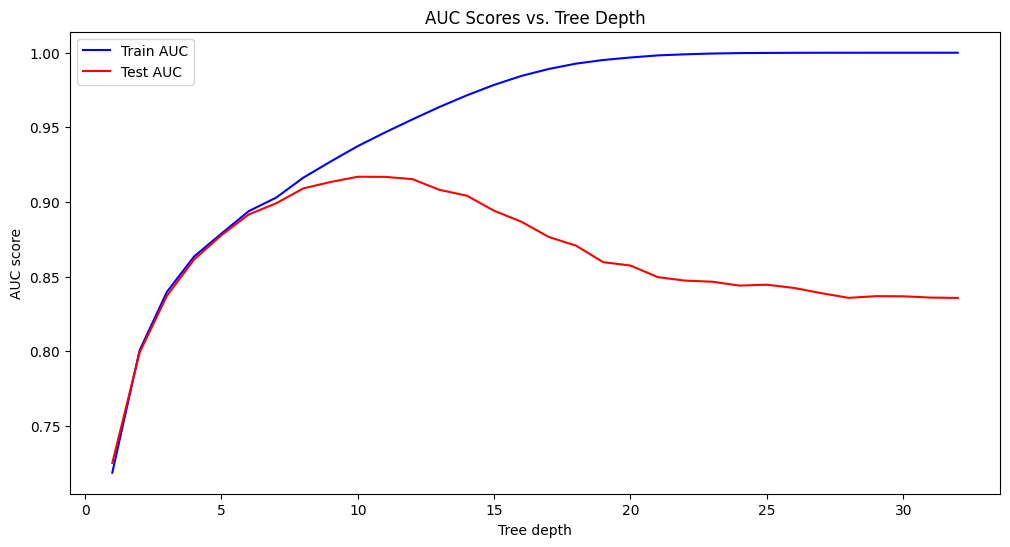

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Generate an array of integer values for max_depth
max_depths = np.arange(1, 33)

train_results = []
test_results = []

# Iterate over each max_depth value
for max_depth in max_depths:
    # Create a DecisionTreeClassifier with the specified max_depth
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    
    # Fit the classifier on the training data
    dt.fit(X_train, y_train)
    
    # Predict probabilities for training data
    train_pred_probs = dt.predict_proba(X_train)[:, 1]
    # Calculate false positive rate and true positive rate for training data
    train_fpr, train_tpr, _ = roc_curve(y_train, train_pred_probs)
    # Calculate AUC score for training data
    train_auc = auc(train_fpr, train_tpr)
    # Append AUC score to train_results
    train_results.append(train_auc)
    
    # Predict probabilities for test data
    test_pred_probs = dt.predict_proba(X_test)[:, 1]
    # Calculate false positive rate and true positive rate for test data
    test_fpr, test_tpr, _ = roc_curve(y_test, test_pred_probs)
    # Calculate AUC score for test data
    test_auc = auc(test_fpr, test_tpr)
    # Append AUC score to test_results
    test_results.append(test_auc)

# Plot AUC scores for both training and test data
plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.xlabel('Tree depth')
plt.ylabel('AUC score')
plt.title('AUC Scores vs. Tree Depth')
plt.legend()
plt.show()


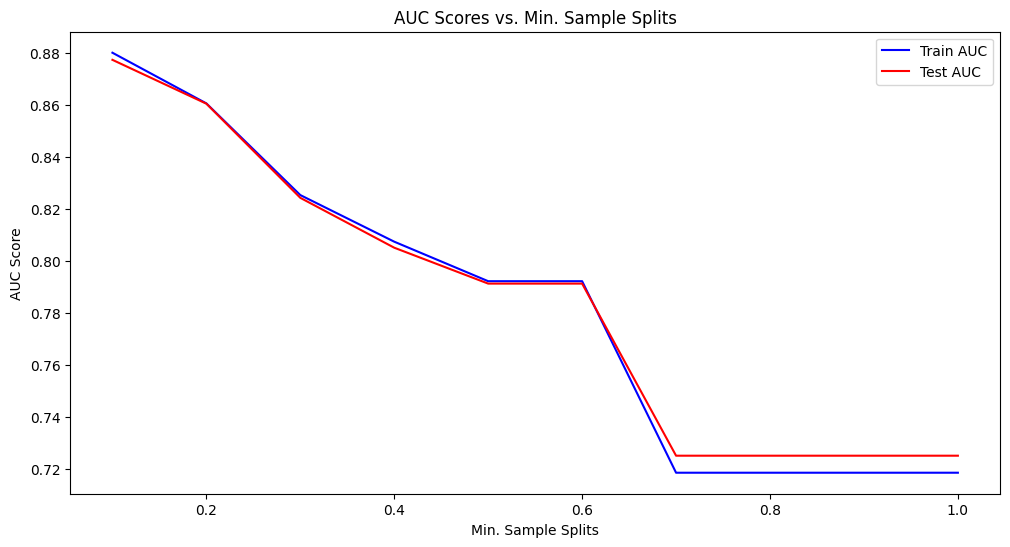

In [152]:

# Generate an array of values for min_samples_split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

# Iterate over each min_samples_split value
for min_samples_split in min_samples_splits:
    # Create a DecisionTreeClassifier with the specified min_samples_split
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=42)
    
    # Fit the classifier on the training data
    dt.fit(X_train, y_train)
    
    # Predict probabilities for training data
    train_pred_probs = dt.predict_proba(X_train)[:, 1]
    # Calculate false positive rate and true positive rate for training data
    train_fpr, train_tpr, _ = roc_curve(y_train, train_pred_probs)
    # Calculate AUC score for training data
    train_auc = auc(train_fpr, train_tpr)
    # Append AUC score to train_results
    train_results.append(train_auc)
    
    # Predict probabilities for test data
    test_pred_probs = dt.predict_proba(X_test)[:, 1]
    # Calculate false positive rate and true positive rate for test data
    test_fpr, test_tpr, _ = roc_curve(y_test, test_pred_probs)
    # Calculate AUC score for test data
    test_auc = auc(test_fpr, test_tpr)
    # Append AUC score to test_results
    test_results.append(test_auc)

# Plot AUC scores for both training and test data
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample Splits')
plt.ylabel('AUC Score')  # Add ylabel for AUC score
plt.title('AUC Scores vs. Min. Sample Splits')
plt.legend()
plt.show()


At a minimum sample split value of 0.8, the Area Under the Curve (AUC) stabilizes for both the training and testing sets. Further increasing the minimum sample split beyond 0.8 does not result in significant improvement in the model's performance.

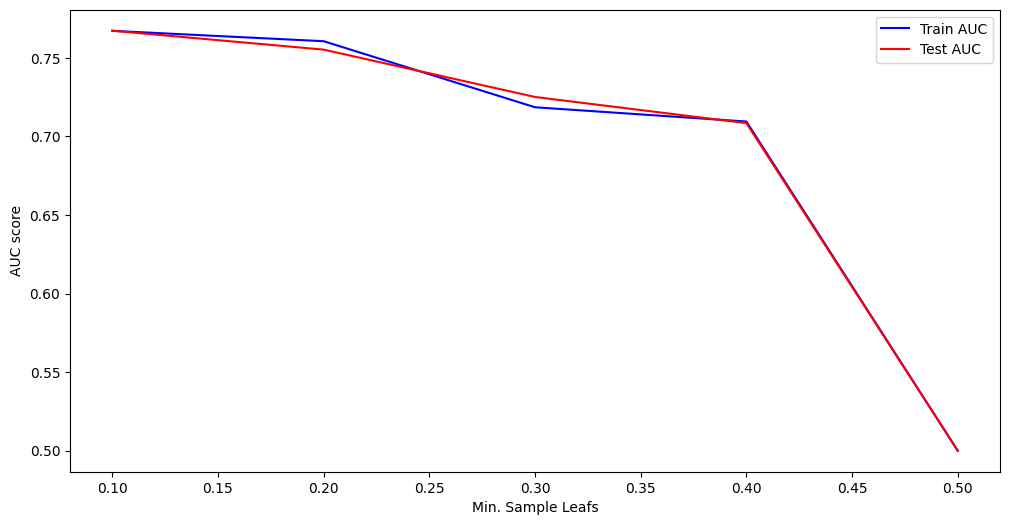

In [153]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

After 0.2, the accuracy of the model drastically plunges.

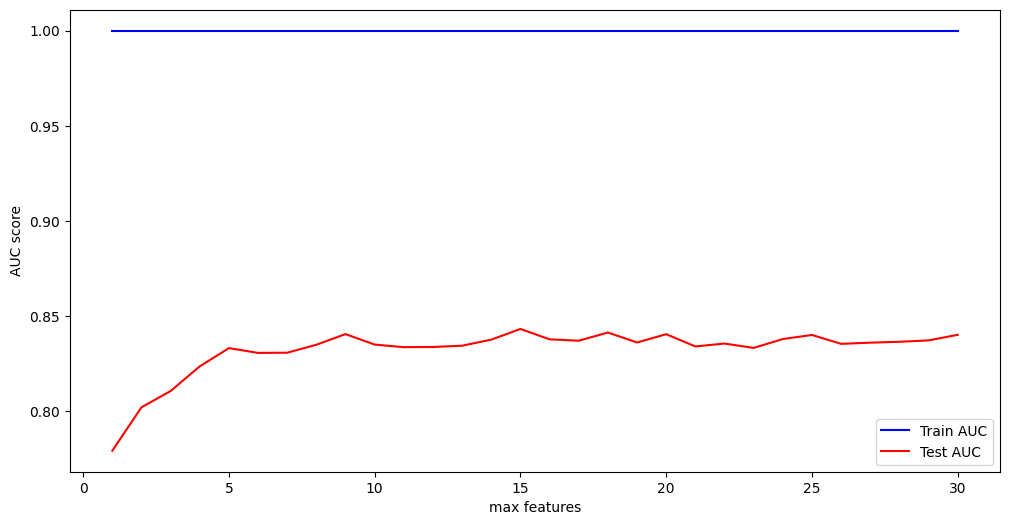

In [154]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

The relationship between maximum feature size and AUC cannot be determined. The fluctuation seen with the test set is not present with the training set

In [155]:

clf = DecisionTreeClassifier(criterion='entropy',
                           max_features=18,
                           max_depth=5,
                           min_samples_split=0.3,
                           min_samples_leaf=0.2, 
                           random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=18,
                       min_samples_leaf=0.2, min_samples_split=0.3,
                       random_state=42)

In [156]:
tree_predict = clf.predict(X_test)

print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Test Score: {clf.score(X_test, y_test)}')

Training Score: 0.6526862731780207
Test Score: 0.6576862123613312


Final Analysis and Reccomendations

In [157]:
start_time = time.time()
importances = rfc.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.042 seconds


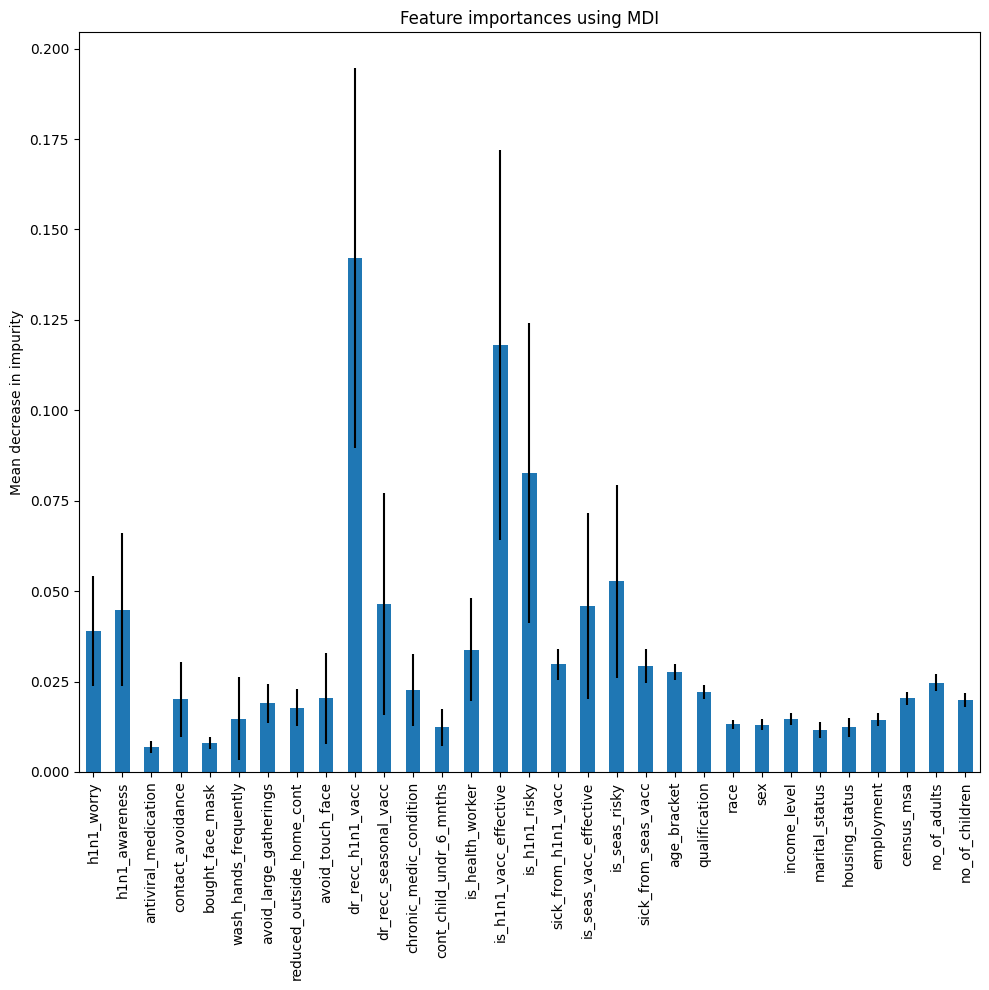

In [158]:
forest_importances = pd.Series(importances, index = X_train.columns)

fig, ax = plt.subplots(figsize = (10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Features 'dr_recc_h1n1_vacc', 'is_h1n1_risky', 'is_h1n1_vacc_effective' appear to be the most important in determining who will get H1N1 vaccines.

In [159]:
H1N1 = {'dr_recc_h1n1_vacc': .14, 'is_h1n1_risky': .12, 'is_h1n1_vacc_effective': .08}

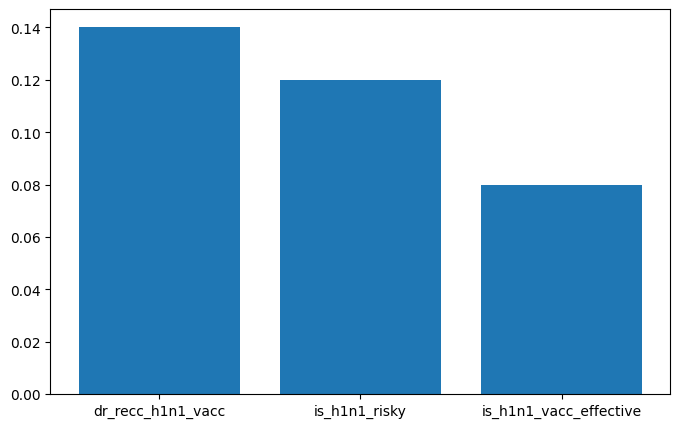

In [160]:
names = list(H1N1.keys())
values = list(H1N1.values())

fig, ax = plt.subplots(figsize = (8,5))
plt.bar(range(len(H1N1)), values, tick_label=names)
plt.show()

In [162]:
X = vac_data.drop(['h1n1_vaccine'], axis = 1)
y = vac_data['h1n1_vaccine']


X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42)

In [163]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Hyperparameter tuning for Decision Tree Classifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

print("Best Parameters for Decision Tree Classifier:", dt_grid.best_params_)
print("Best Cross-Validation Accuracy:", dt_grid.best_score_)

# Hyperparameter tuning for Random Forest Classifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Best Parameters for Random Forest Classifier:", rf_grid.best_params_)
print("Best Cross-Validation Accuracy:", rf_grid.best_score_)

# Cross-validation for Logistic Regression
log_reg_cv = cross_val_score(LogisticRegression(max_iter=10000), X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy for Logistic Regression:", log_reg_cv.mean())

# Model Comparison
models = {
    "Decision Tree": dt_grid.best_estimator_,
    "Random Forest": rf_grid.best_estimator_,
    "Logistic Regression": LogisticRegression(max_iter=10000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"{name}:")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print()

# Further analysis, deployment, and other steps can be added based on the project's requirements.


Best Parameters for Decision Tree Classifier: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8464648112318989


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 6

Best Parameters for Random Forest Classifier: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.9000203596760787
Cross-Validation Accuracy for Logistic Regression: 0.7782723681832059
Decision Tree:
Training Accuracy: 0.8704408069007675
Test Accuracy: 0.85

Random Forest:
Training Accuracy: 0.9999660395299871
Test Accuracy: 0.9035657686212362

Logistic Regression:
Training Accuracy: 0.7788494192759627
Test Accuracy: 0.7787638668779715

